In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE


In [2]:
from google.colab import files
uploaded = files.upload()

file_path = 'automobile.dat'


Saving automobile.dat to automobile.dat


In [3]:
file_path = 'automobile.dat'

metadata = []
data_lines = []
data_section = False

with open(file_path, 'r') as file:
    for line in file:
        if line.strip().lower().startswith('@data'):
            data_section = True
            continue
        if data_section:
            data_lines.append(line.strip())
        else:
            metadata.append(line.strip())


attribute_lines = [line for line in metadata if line.lower().startswith('@attribute')]
column_names = [line.split()[1] for line in attribute_lines]


data_cleaned = [line.replace('?', 'NaN').split(',') for line in data_lines]
df = pd.DataFrame(data_cleaned, columns=column_names)


for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


target_col = 'Symboling'
X = df.drop(columns=[target_col])
y = pd.to_numeric(df[target_col], errors='coerce')
numerical_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(df[col])]
categorical_cols = [col for col in X.columns if col not in numerical_cols]
print(df.head())
print(df.info())
print(df.describe(include='all'))

<ipython-input-3-41e5dae85d52>:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


  Normalized-losses        Make Fuel-type Aspiration Num-of-doors Body-style  \
0               168      toyota       gas        std          two      sedan   
1               113       mazda       gas        std         four      sedan   
2                87      toyota       gas        std          two  hatchback   
3               125  mitsubishi       gas        std         four      sedan   
4               148       dodge       gas      turbo          NaN      sedan   

  Drive-wheels Engine-location  Wheel-base  Length  ...  Fuel-system  Bore  \
0          rwd           front        94.5   168.7  ...         2bbl  3.19   
1          fwd           front        93.1   166.8  ...         2bbl  3.08   
2          fwd           front        95.7   158.7  ...         2bbl  3.05   
3          fwd           front        96.3   172.4  ...         2bbl  3.35   
4          fwd           front        93.7   157.3  ...         mpfi  3.03   

   Stroke Compression-ratio Horsepower  Peak-rpm C

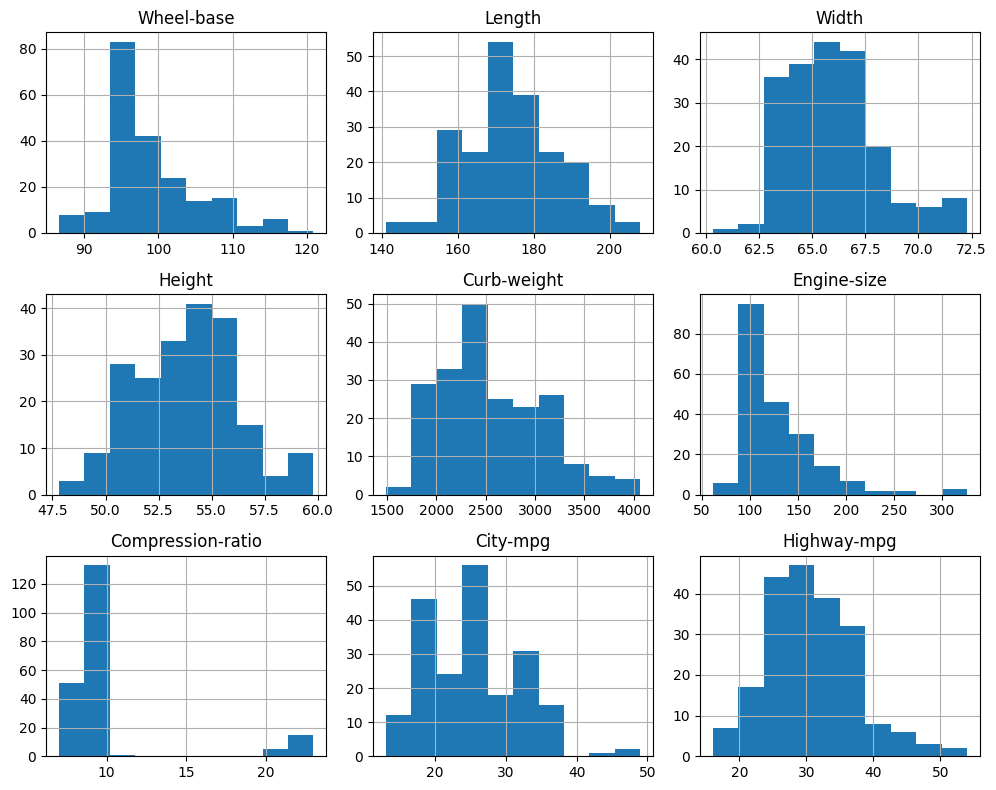

In [4]:
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


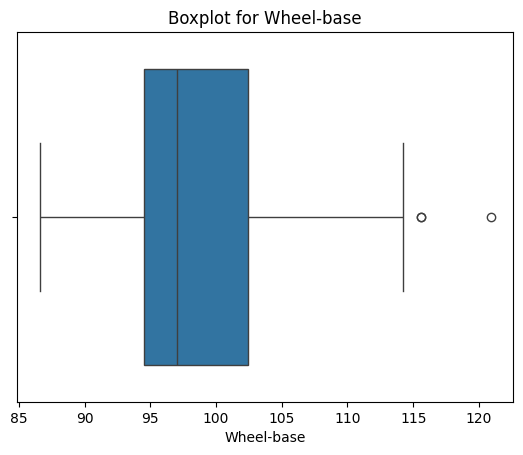

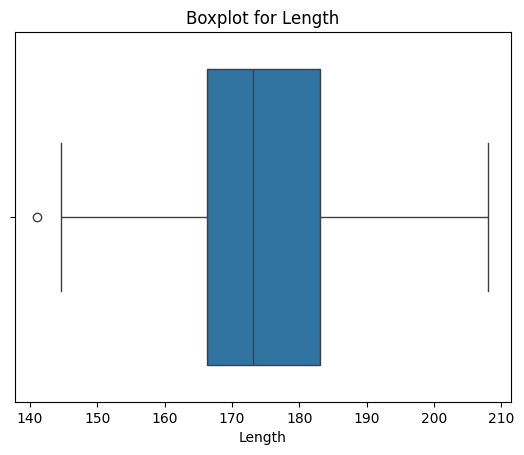

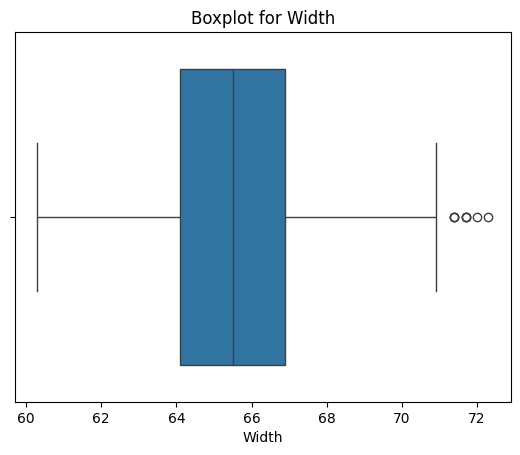

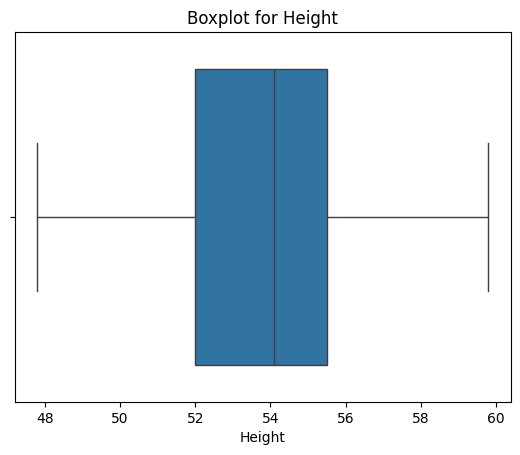

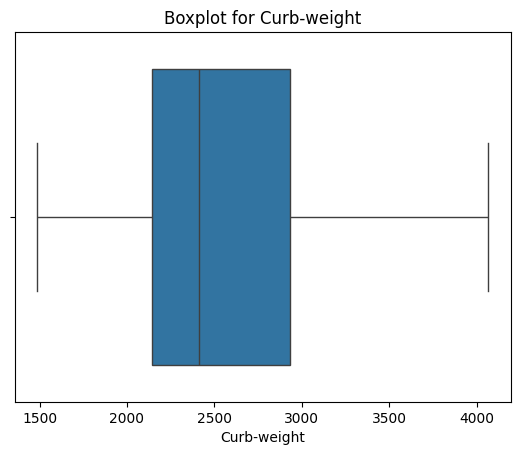

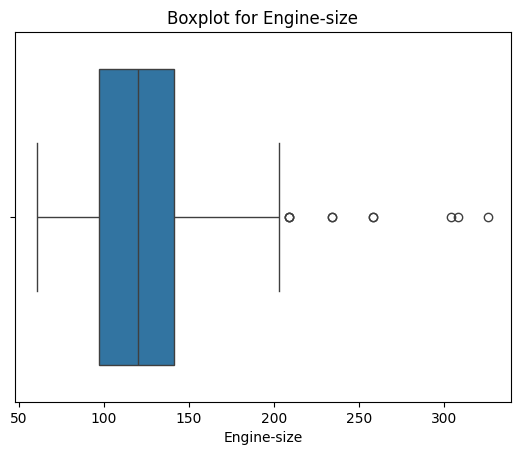

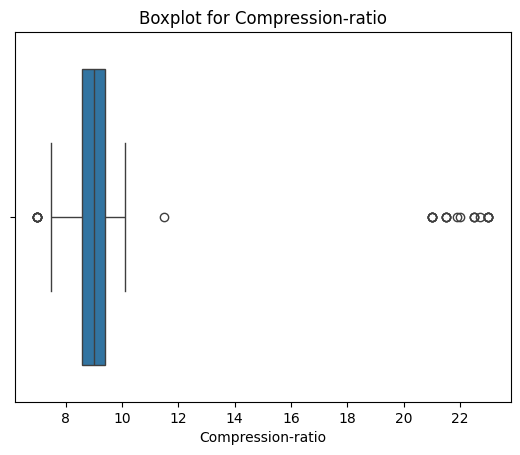

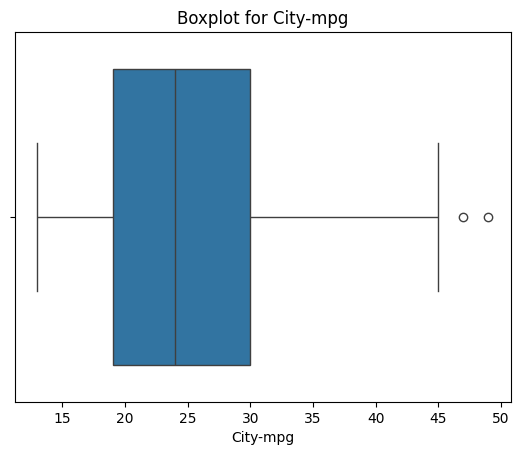

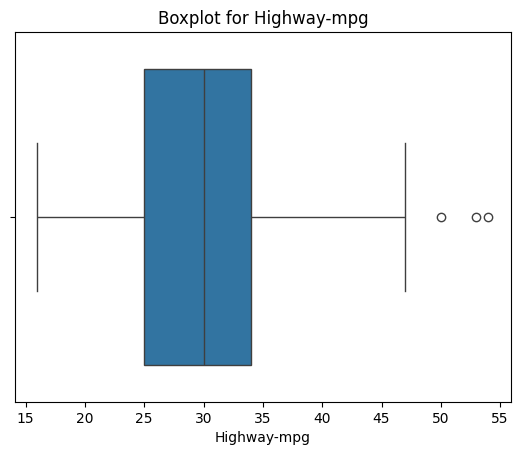

In [5]:
for col in numerical_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


Value counts for Normalized-losses:
 Normalized-losses
NaN    41
161    11
91      8
150     7
128     6
134     6
104     6
85      5
103     5
65      5
94      5
168     5
102     5
95      5
74      5
122     4
118     4
93      4
106     4
148     4
137     3
83      3
101     3
115     3
154     3
125     3
119     2
158     2
129     2
108     2
153     2
87      2
145     2
188     2
194     2
192     2
164     2
113     2
110     2
197     2
81      2
89      2
142     1
107     1
256     1
121     1
90      1
231     1
78      1
77      1
98      1
186     1
Name: count, dtype: int64


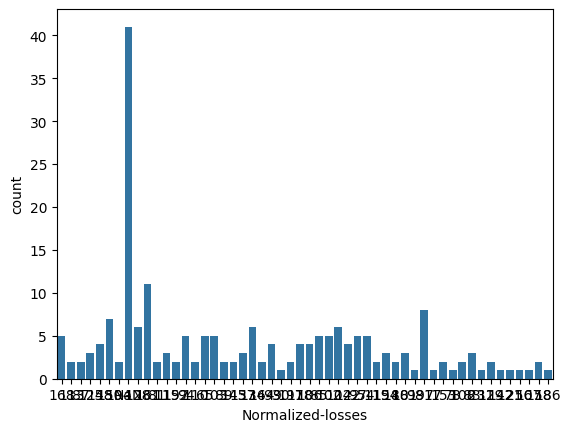

Value counts for Make:
 Make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64


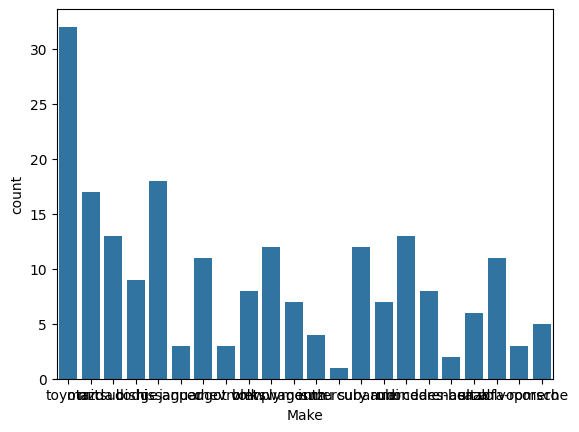

Value counts for Fuel-type:
 Fuel-type
gas       185
diesel     20
Name: count, dtype: int64


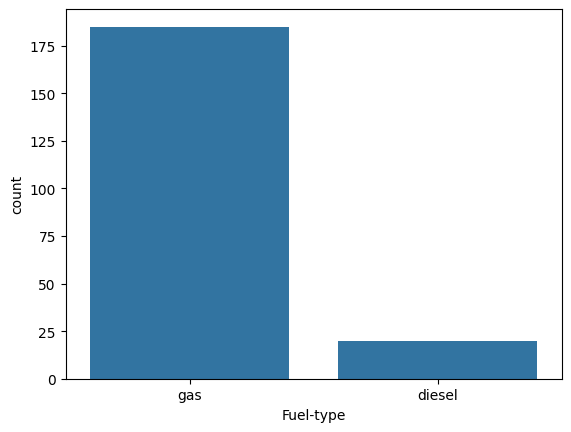

Value counts for Aspiration:
 Aspiration
std      168
turbo     37
Name: count, dtype: int64


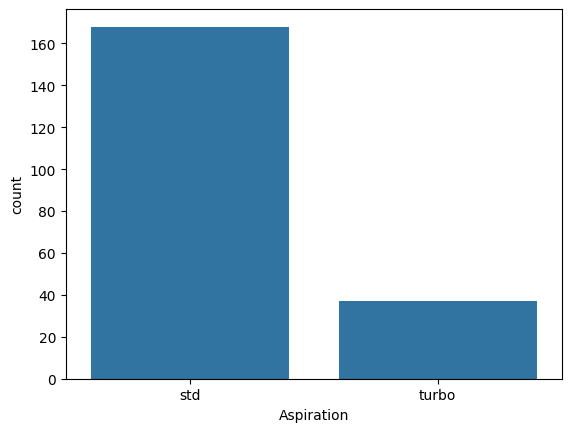

Value counts for Num-of-doors:
 Num-of-doors
four    114
two      89
NaN       2
Name: count, dtype: int64


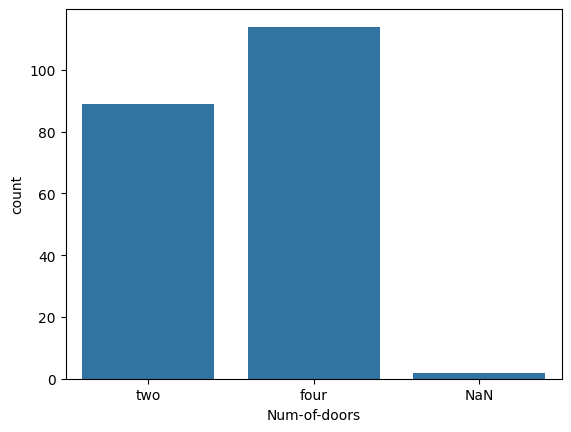

Value counts for Body-style:
 Body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


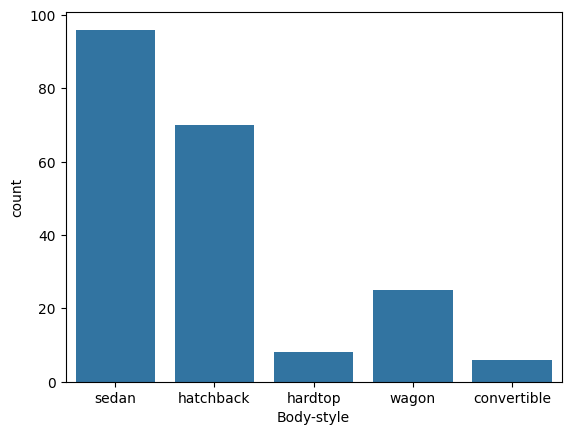

Value counts for Drive-wheels:
 Drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


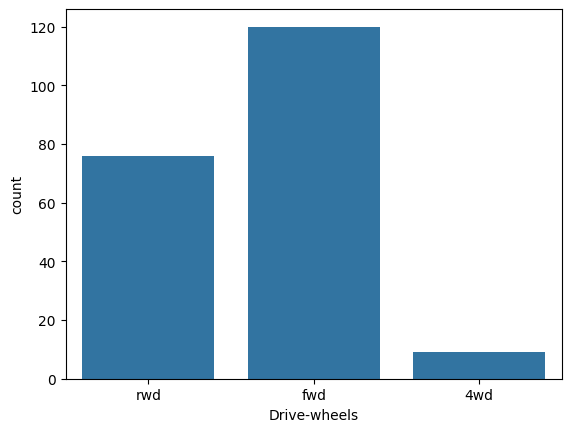

Value counts for Engine-location:
 Engine-location
front    202
rear       3
Name: count, dtype: int64


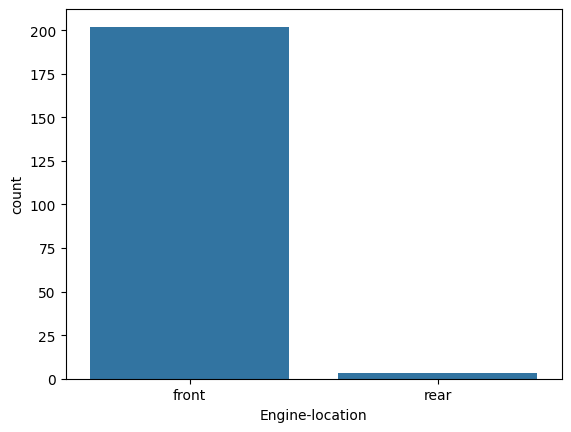

Value counts for Engine-type:
 Engine-type
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: count, dtype: int64


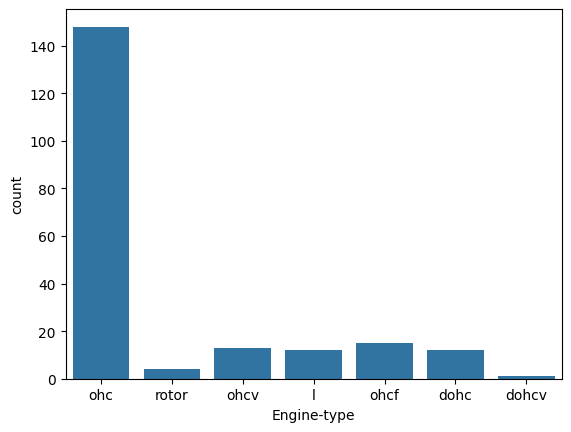

Value counts for Num-of-cylinders:
 Num-of-cylinders
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64


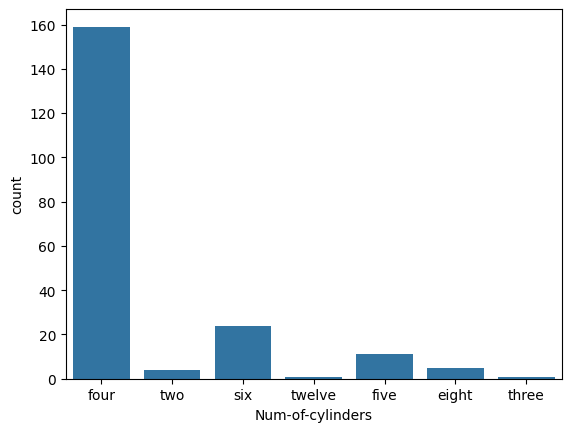

Value counts for Fuel-system:
 Fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: count, dtype: int64


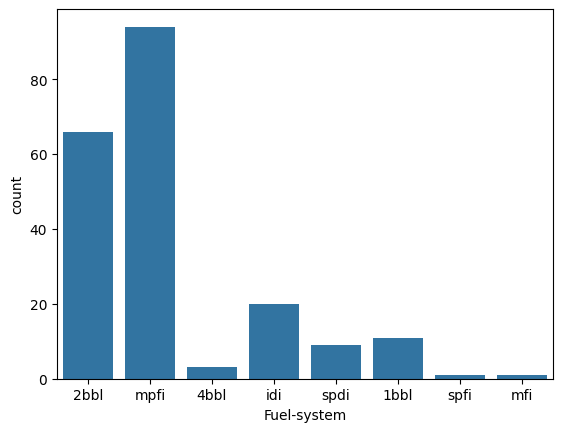

Value counts for Bore:
 Bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.43     8
3.31     8
3.27     7
2.91     7
3.39     6
3.54     6
3.58     6
3.05     6
3.7      5
3.01     5
NaN      4
3.35     4
3.74     3
3.17     3
3.59     3
3.63     2
3.94     2
3.8      2
3.33     2
3.47     2
3.13     2
3.24     2
3.5      2
2.92     1
3.6      1
2.68     1
3.76     1
2.54     1
3.34     1
3.61     1
3.08     1
2.99     1
Name: count, dtype: int64


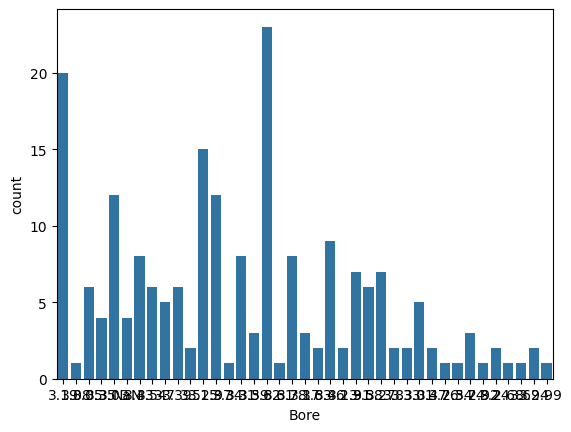

Value counts for Stroke:
 Stroke
3.4     20
3.03    14
3.15    14
3.23    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.5      6
3.41     6
3.19     6
3.07     6
3.58     6
3.11     6
3.27     6
3.52     5
3.64     5
3.86     4
3.47     4
NaN      4
3.54     4
2.9      3
3.9      3
2.68     2
3.1      2
3.08     2
4.17     2
2.19     2
2.8      2
3.12     1
3.16     1
2.07     1
3.21     1
2.76     1
2.36     1
2.87     1
Name: count, dtype: int64


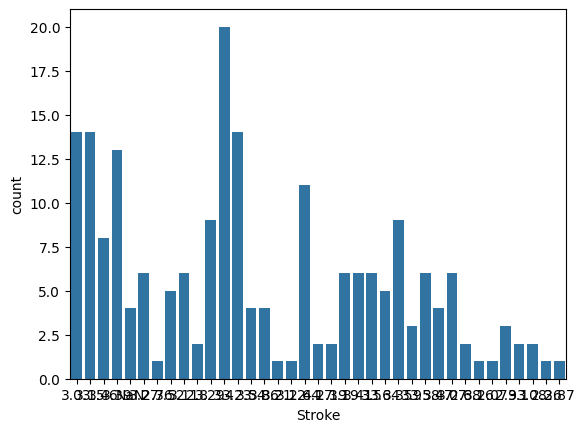

Value counts for Horsepower:
 Horsepower
68     19
70     11
69     10
116     9
110     8
95      7
101     6
160     6
88      6
114     6
62      6
102     5
76      5
82      5
84      5
145     5
97      5
111     4
123     4
86      4
92      4
90      3
73      3
207     3
121     3
182     3
152     3
85      3
112     2
100     2
155     2
94      2
162     2
56      2
176     2
52      2
184     2
NaN     2
161     2
156     2
288     1
134     1
135     1
140     1
64      1
115     1
154     1
55      1
262     1
48      1
72      1
106     1
200     1
120     1
78      1
60      1
142     1
58      1
175     1
143     1
Name: count, dtype: int64


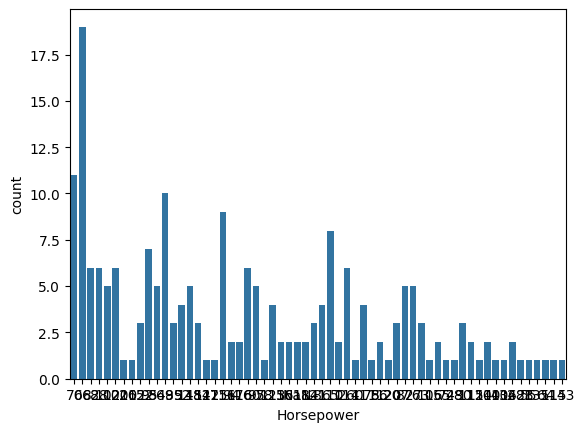

Value counts for Peak-rpm:
 Peak-rpm
5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
4250     3
5900     3
4400     3
5100     3
NaN      2
6600     2
5600     1
5300     1
4900     1
5750     1
4650     1
Name: count, dtype: int64


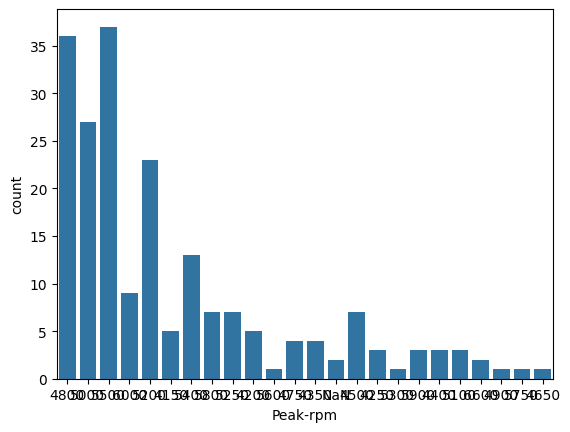

Value counts for Price:
 Price
NaN      4
7775     2
8495     2
7957     2
9279     2
        ..
8778     1
18280    1
6918     1
11549    1
25552    1
Name: count, Length: 187, dtype: int64


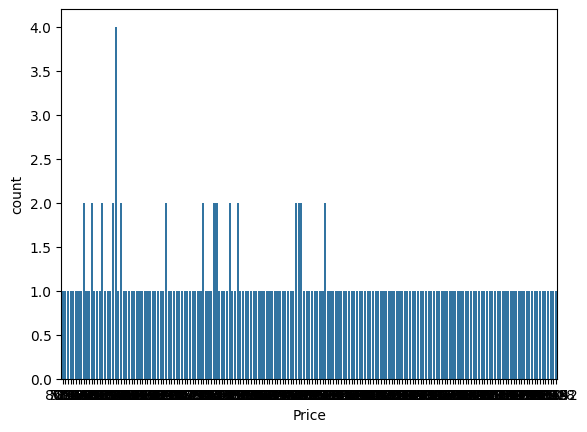

In [6]:
for col in categorical_cols:
    print(f"Value counts for {col}:\n", df[col].value_counts())
    sns.countplot(data=df, x=col)
    plt.show()

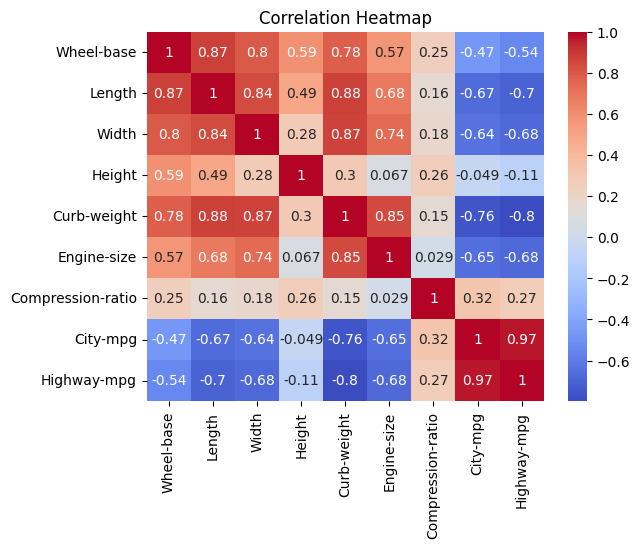

In [7]:
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

X_preprocessed = preprocessor.fit_transform(X)




print("Original class distribution:")
print(y.value_counts())


min_class_samples = y.value_counts().min()
smote_k_neighbors = min(min_class_samples - 1, 5)
print(f"Using k_neighbors={smote_k_neighbors} for SMOTE.")

smote = SMOTE(random_state=42, k_neighbors=smote_k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())


Original class distribution:
Symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
Using k_neighbors=2 for SMOTE.
Resampled class distribution:
Symboling
 1    67
 3    67
 0    67
 2    67
-1    67
-2    67
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42, stratify=y
)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

<ipython-input-10-ff87d963f2f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")


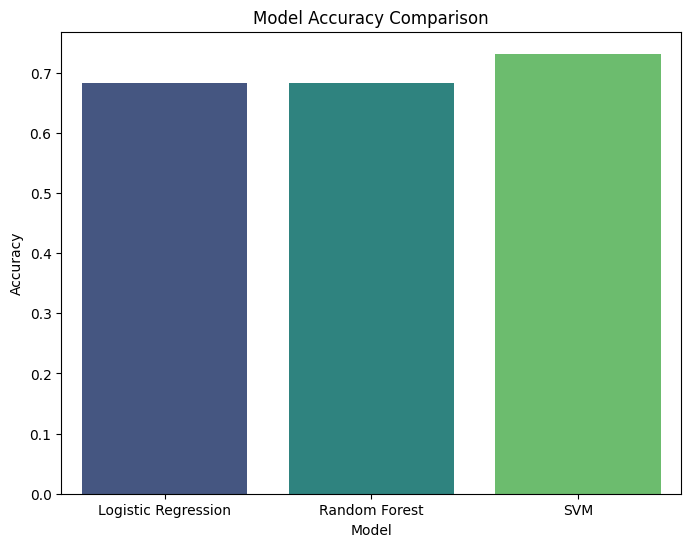

In [10]:
accuracy_scores = {name: result['Accuracy'] for name, result in results.items()}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()



In [11]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy after Tuning:", best_rf_accuracy)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy after Tuning: 0.6829268292682927


In [12]:
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['Classification Report']).transpose())
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n")

Results for Logistic Regression:
Accuracy: 0.6829268292682927
Classification Report:
              precision    recall  f1-score    support
-2             0.000000  0.000000  0.000000   1.000000
-1             0.500000  0.750000  0.600000   4.000000
0              0.750000  0.923077  0.827586  13.000000
1              0.777778  0.636364  0.700000  11.000000
2              1.000000  0.285714  0.444444   7.000000
3              0.500000  0.800000  0.615385   5.000000
accuracy       0.682927  0.682927  0.682927   0.682927
macro avg      0.587963  0.565859  0.531236  41.000000
weighted avg   0.726965  0.682927  0.659675  41.000000
Confusion Matrix:
[[ 0  1  0  0  0  0]
 [ 0  3  1  0  0  0]
 [ 0  1 12  0  0  0]
 [ 0  1  1  7  0  2]
 [ 0  0  2  1  2  2]
 [ 0  0  0  1  0  4]]


Results for Random Forest:
Accuracy: 0.6829268292682927
Classification Report:
              precision    recall  f1-score    support
-2             0.000000  0.000000  0.000000   1.000000
-1             0.750000  0.75